In [2]:
#K-Mean Clustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [3]:
crime=pd.read_csv('C:\\Users\\yugan\\Downloads\\crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
def minmax_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
df_norm = minmax_func(crime.iloc[:,1:])

In [6]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [7]:
def norm_func(i):
    x=(i-i.mean())/(i.std())
    return (x)

In [8]:
x=norm_func(crime.iloc[:,1:])
x

,Murder,Assault,UrbanPop,Rape
0,1.242564,0.782839,-0.520907,-0.003416
1,0.507862,1.106823,-1.211764,2.484203
2,0.071633,1.478803,0.998980,1.042878
3,0.232349,0.230868,-1.073593,-0.184917
4,0.278268,1.262814,1.758923,2.067820
5,0.025715,0.398859,0.860809,1.864967
6,-1.030419,-0.729082,0.791723,-1.081741
7,-0.433474,0.806838,0.446294,-0.579946
8,1.747671,1.970778,0.998980,1.138967
9,2.206860,0.482855,-0.382735,0.487702


In [10]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_crime_df=scaler.fit_transform(crime.iloc[:,1:])

In [11]:
scaled_crime_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

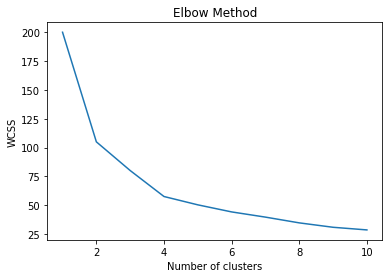

In [12]:
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
clusters_new= KMeans(4,random_state=0)
clusters_new.fit(scaled_crime_df)

KMeans(n_clusters=4, random_state=0)

In [14]:
clusters_new.labels_

array([0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 3, 1, 2, 3, 2, 3, 0, 3, 1, 2, 1,
       3, 0, 1, 3, 3, 1, 3, 2, 1, 1, 0, 3, 2, 2, 2, 2, 2, 0, 3, 0, 1, 2,
       3, 2, 2, 3, 3, 2])

In [17]:
crime['clusterid_new']=clusters_new.labels_

In [18]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,0


In [19]:
clusters_new.cluster_centers_

array([[ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842]])

In [20]:
crime.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,13.937500,243.625000,53.750000,21.412500
1,1,10.815385,257.384615,76.000000,33.192308
2,2,5.656250,138.875000,73.875000,18.781250
3,3,3.600000,78.538462,52.076923,12.176923


In [21]:
crime['clusterid_new']=crime['clusterid_new'].replace(0,'Cluster 1')
crime['clusterid_new']=crime['clusterid_new'].replace(1,'Cluster 2')
crime['clusterid_new']=crime['clusterid_new'].replace(2,'Cluster 3')
crime['clusterid_new']=crime['clusterid_new'].replace(3,'Cluster 4')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,Cluster 1
1,Alaska,10.0,263,48,44.5,Cluster 2
2,Arizona,8.1,294,80,31.0,Cluster 2
3,Arkansas,8.8,190,50,19.5,Cluster 1
4,California,9.0,276,91,40.6,Cluster 2
5,Colorado,7.9,204,78,38.7,Cluster 2
6,Connecticut,3.3,110,77,11.1,Cluster 3
7,Delaware,5.9,238,72,15.8,Cluster 3
8,Florida,15.4,335,80,31.9,Cluster 2
9,Georgia,17.4,211,60,25.8,Cluster 1


In [22]:
crime['clusterid_new'].value_counts()

Cluster 3    16
Cluster 2    13
Cluster 4    13
Cluster 1     8
Name: clusterid_new, dtype: int64

# Hierarchical Clustering

In [4]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [24]:
crime=pd.read_csv('C:\\Users\\yugan\\Downloads\\crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [32]:
def minmax_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [33]:
df_norm = minmax_func(crime.iloc[:,1:])

In [34]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


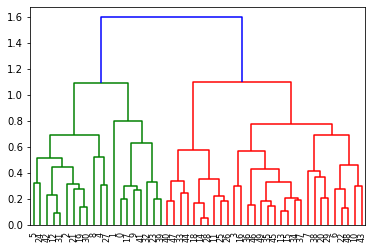

In [35]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [38]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [39]:
y_hc=hc.fit_predict(df_norm)
y_hc

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [43]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [44]:
Clusters

,Clusters
0,0
1,0
2,3
3,1
4,3
5,3
6,1
7,1
8,3
9,0


In [47]:
Clusters.value_counts()

Clusters
1           20
3           12
2           10
0            8
dtype: int64

In [48]:
crime['h_clusterid']=y_hc
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,0


In [49]:
crime.groupby('h_clusterid').mean()

,Murder,Assault,UrbanPop,Rape
h_clusterid,,,,
0,14.087500,252.750000,53.500000,24.5375
1,5.715000,132.300000,70.800000,18.1000
2,3.180000,78.700000,49.300000,11.6300
3,10.883333,256.916667,78.333333,32.2500


In [1]:
#DBSCAN

In [5]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [6]:
crime=pd.read_csv('C:\\Users\\yugan\\Downloads\\crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [7]:
print(crime.head())

   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6


In [8]:
print(crime.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB
None


In [18]:
crime.drop(crime.columns[[0]], axis = 1, inplace = True)

In [19]:
crime

,Assault,UrbanPop,Rape
0,236,58,21.2
1,263,48,44.5
2,294,80,31.0
3,190,50,19.5
4,276,91,40.6
5,204,78,38.7
6,110,77,11.1
7,238,72,15.8
8,335,80,31.9
9,211,60,25.8


In [20]:
array=crime.values

In [21]:
array

array([[236. ,  58. ,  21.2],
       [263. ,  48. ,  44.5],
       [294. ,  80. ,  31. ],
       [190. ,  50. ,  19.5],
       [276. ,  91. ,  40.6],
       [204. ,  78. ,  38.7],
       [110. ,  77. ,  11.1],
       [238. ,  72. ,  15.8],
       [335. ,  80. ,  31.9],
       [211. ,  60. ,  25.8],
       [ 46. ,  83. ,  20.2],
       [120. ,  54. ,  14.2],
       [249. ,  83. ,  24. ],
       [113. ,  65. ,  21. ],
       [ 56. ,  57. ,  11.3],
       [115. ,  66. ,  18. ],
       [109. ,  52. ,  16.3],
       [249. ,  66. ,  22.2],
       [ 83. ,  51. ,   7.8],
       [300. ,  67. ,  27.8],
       [149. ,  85. ,  16.3],
       [255. ,  74. ,  35.1],
       [ 72. ,  66. ,  14.9],
       [259. ,  44. ,  17.1],
       [178. ,  70. ,  28.2],
       [109. ,  53. ,  16.4],
       [102. ,  62. ,  16.5],
       [252. ,  81. ,  46. ],
       [ 57. ,  56. ,   9.5],
       [159. ,  89. ,  18.8],
       [285. ,  70. ,  32.1],
       [254. ,  86. ,  26.1],
       [337. ,  45. ,  16.1],
       [ 4

In [72]:
stscaler=StandardScaler().fit(array)
X=stscaler.transform(array)

In [73]:
X

array([[ 0.79078716, -0.52619514, -0.00345116],
       [ 1.11805959, -1.22406668,  2.50942392],
       [ 1.49381682,  1.00912225,  1.05346626],
       [ 0.23321191, -1.08449238, -0.18679398],
       [ 1.2756352 ,  1.77678094,  2.08881393],
       [ 0.40290872,  0.86954794,  1.88390137],
       [-0.73648418,  0.79976079, -1.09272319],
       [ 0.81502956,  0.45082502, -0.58583422],
       [ 1.99078607,  1.00912225,  1.1505301 ],
       [ 0.48775713, -0.38662083,  0.49265293],
       [-1.51224105,  1.21848371, -0.11129987],
       [-0.61527217, -0.80534376, -0.75839217],
       [ 0.94836277,  1.21848371,  0.29852525],
       [-0.70012057, -0.03768506, -0.0250209 ],
       [-1.39102904, -0.5959823 , -1.07115345],
       [-0.67587817,  0.03210209, -0.34856705],
       [-0.74860538, -0.94491807, -0.53190987],
       [ 0.94836277,  0.03210209,  0.10439756],
       [-1.06375661, -1.01470522, -1.44862395],
       [ 1.56654403,  0.10188925,  0.70835037],
       [-0.26375734,  1.35805802, -0.531

In [74]:
dbscan=DBSCAN(eps=0.8,min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [75]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1, -1, -1,  0, -1,  0,  0,  0, -1, -1, -1, -1, -1, -1,  0,
        0,  0,  0,  0, -1, -1,  0, -1, -1,  0, -1,  0,  0,  0,  0,  0],
      dtype=int64)

In [76]:
crime['cluster']=pd.DataFrame(dbscan.labels_)
crime

,Assault,UrbanPop,Rape,cluster
0,236,58,21.2,-1
1,263,48,44.5,-1
2,294,80,31.0,-1
3,190,50,19.5,-1
4,276,91,40.6,-1
5,204,78,38.7,-1
6,110,77,11.1,0
7,238,72,15.8,-1
8,335,80,31.9,-1
9,211,60,25.8,-1


In [77]:
crime['cluster'].value_counts()

-1    27
 0    23
Name: cluster, dtype: int64

In [78]:
(len(crime[crime['cluster']==-1])/len(crime))*100

54.0

In [79]:
X=metrics.silhouette_score(X,dbscan.labels_)
X

0.21470764142109838

# WEST AIRLINE

In [80]:
#HIREACHICAL CLUSTER

In [81]:
air=pd.read_csv('C:\\Users\\yugan\\Downloads\\EastWestAirlines.csv')

In [82]:
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [85]:
def minmax_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [86]:
df_norm=minmax_func(air.iloc[:,1:])
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


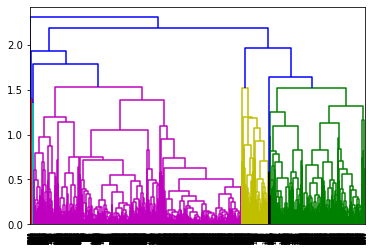

In [89]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))


In [90]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [91]:
y_hc=hc.fit_predict(df_norm)

In [92]:
y_hc

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [93]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [94]:
Clusters

,Clusters
0,0
1,0
2,0
3,0
4,1
...,...
3994,2
3995,2
3996,2
3997,0


In [95]:
Clusters.value_counts()

Clusters
0           2526
2           1144
1            325
3              4
dtype: int64

In [96]:
y_hc

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [97]:
air['h_clusterid']=y_hc

In [98]:
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [101]:
air.groupby('h_clusterid').mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
h_clusterid,,,,,,,,,,,,
0,2171.213381,59791.056611,88.188836,1.703484,1.018606,1.011085,10324.882423,9.192003,230.441013,0.672209,3824.887965,0.003167
1,1106.516923,157084.578462,208.673846,4.661538,1.000000,1.061538,70477.086154,23.249231,1019.433846,3.196923,5770.572308,1.000000
2,1923.643357,80173.963287,248.550699,2.104895,1.009615,1.000874,16882.864510,13.412587,739.958916,2.236888,4304.383741,1.000000
3,3128.000000,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000


# k-Mean Clustering

In [102]:
air=pd.read_csv('C:\\Users\\yugan\\Downloads\\EastWestAirlines.csv')

In [129]:
air.drop(['ID#'], axis = 1, inplace = True)

In [130]:
air

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,2


In [131]:
def norm_func(i):
    x=(i-i.mean())/(i.std())
    return (x)

In [132]:
x=norm_func(air.iloc[:,1:])
x

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,-0.186275,-0.769482,-0.09823,-0.062759,-0.702698,-1.103926,-0.328562,-0.362123,1.395280,-0.766823,0.688502
1,-0.186275,-0.769482,-0.09823,-0.062759,-0.701001,-0.999801,-0.328562,-0.362123,1.379784,-0.766823,0.688502
2,-0.186275,-0.769482,-0.09823,-0.062759,-0.539185,-0.791550,-0.328562,-0.362123,1.411744,-0.766823,0.688502
3,-0.186275,-0.769482,-0.09823,-0.062759,-0.689200,-1.103926,-0.328562,-0.362123,1.372037,-0.766823,0.688502
4,-0.186275,1.409295,-0.09823,-0.062759,1.082986,1.499207,1.154788,0.692404,1.363805,1.303755,-1.044235
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.186275,-0.769482,-0.09823,-0.062759,-0.356915,-0.791550,-0.185726,-0.098491,-1.314955,1.303755,0.688502
3995,-0.186275,-0.769482,-0.09823,-0.062759,-0.669284,-0.687425,-0.328562,-0.362123,-1.318829,1.303755,0.688502
3996,-0.186275,0.683036,-0.09823,-0.062759,0.343761,-0.375049,-0.328562,-0.362123,-1.315439,1.303755,-1.044235
3997,-0.186275,-0.769482,-0.09823,-0.062759,-0.689200,-1.103926,0.028527,-0.098491,-1.315924,-0.766823,0.688502


In [133]:
from sklearn.preprocessing import StandardScaler

In [134]:
scaler=StandardScaler()
scaled_air_df=scaler.fit_transform(air.iloc[:,1:])

In [135]:
scaled_air_df

array([[-0.18629869, -0.76957841, -0.09824189, ...,  1.39545434,
        -0.7669193 ,  0.68858786],
       [-0.18629869, -0.76957841, -0.09824189, ...,  1.37995704,
        -0.7669193 ,  0.68858786],
       [-0.18629869, -0.76957841, -0.09824189, ...,  1.41192021,
        -0.7669193 ,  0.68858786],
       ...,
       [-0.18629869,  0.68312117, -0.09824189, ..., -1.31560393,
         1.30391816, -1.04436547],
       [-0.18629869, -0.76957841, -0.09824189, ..., -1.31608822,
        -0.7669193 ,  0.68858786],
       [-0.18629869, -0.76957841, -0.09824189, ..., -1.31754109,
        -0.7669193 ,  0.68858786]])

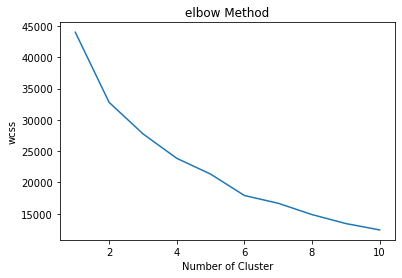

In [136]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_air_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('wcss')
plt.show()

In [137]:
clusters_new=KMeans(4,random_state=0)
clusters_new.fit(scaled_air_df)

KMeans(n_clusters=4, random_state=0)

In [138]:
clusters_new.labels_

array([1, 1, 1, ..., 2, 1, 1])

In [139]:
air['clusterid_new']=clusters_new.labels_
air

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [140]:
clusters_new.cluster_centers_

array([[ 1.02758112e+00,  8.76832606e-02,  1.38046790e-01,
        -6.27665798e-02,  5.80073471e-01,  1.55085819e+00,
         3.43518798e+00,  3.68477621e+00,  2.71078190e-01,
         9.06606321e-01, -2.77731881e+00],
       [-6.21218949e-02, -6.06746470e-01,  3.16121144e-02,
        -6.07624635e-02, -5.13634008e-01, -4.85712457e-01,
        -1.85765523e-01, -1.97635421e-01, -2.01009323e-01,
        -3.44001790e-01,  6.85875882e-01],
       [-1.32913183e-02,  1.21053439e+00, -8.20628853e-02,
        -5.46096985e-02,  9.27850731e-01,  7.55584574e-01,
        -9.27826813e-02, -1.03121659e-01,  3.69073480e-01,
         5.71870523e-01, -1.04436547e+00],
       [-8.44329231e-02,  1.02208440e+00, -9.82418871e-02,
         1.56462993e+01,  3.17969131e+00,  1.71461374e+00,
         3.32926913e-02,  5.96953922e-02,  2.39872612e-01,
         3.37527346e-01,  2.42154119e+00]])

In [141]:
air.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,191266.395349,939.017442,2.180233,1.034884,1.000000,31152.430233,26.494186,5269.436047,15.348837,4678.302326,0.808140
1,1,45027.328247,96.059077,1.224178,1.019171,1.000391,4741.638889,6.937793,199.977700,0.624022,3703.500000,0.204225
2,2,114867.131369,133.832803,3.726115,1.002389,1.001592,39550.537420,18.857484,330.156847,0.982484,4880.650478,0.646497
3,3,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


In [147]:
air['clusterid_new']=air['clusterid_new'].replace(0,'Cluster 1')
air['clusterid_new']=air['clusterid_new'].replace(1,'Cluster 2')
air['clusterid_new']=air['clusterid_new'].replace(2,'Cluster 3')
air['clusteris_new']=air['clusterid_new'].replace(3,'cluster 4')
air['clusteris_new']=air['clusterid_new'].replace(4,'cluster 5')
air

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new,clusteris_new
0,28143,0,1,1,1,174,1,0,0,7000,0,Cluster 2,Cluster 2
1,19244,0,1,1,1,215,2,0,0,6968,0,Cluster 2,Cluster 2
2,41354,0,1,1,1,4123,4,0,0,7034,0,Cluster 2,Cluster 2
3,14776,0,1,1,1,500,1,0,0,6952,0,Cluster 2,Cluster 2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,Cluster 3,Cluster 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,Cluster 2,Cluster 2
3995,64385,0,1,1,1,981,5,0,0,1395,1,Cluster 2,Cluster 2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,Cluster 3,Cluster 3
3997,54899,0,1,1,1,500,1,500,1,1401,0,Cluster 2,Cluster 2


In [148]:
air['clusterid_new'].value_counts()

Cluster 2    2556
Cluster 3    1256
Cluster 1     172
3              15
Name: clusterid_new, dtype: int64

# DBSCAN

In [149]:
air=pd.read_csv('C:\\Users\\yugan\\Downloads\\EastWestAirlines.csv')
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [150]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [151]:
air=pd.read_csv('C:\\Users\\yugan\\Downloads\\EastWestAirlines.csv')
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [152]:
print(air.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None


In [153]:
print(air.head())

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


In [154]:
air.drop(['ID#'],axis=1, inplace=True)

In [155]:
air

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [157]:
array=air.values

In [183]:
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [193]:
stscaler=StandardScaler().fit(array)
X=stscaler.transform(array)

In [194]:
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [195]:
dbscan=DBSCAN(eps=1.0,min_samples=8)
dbscan.fit(X)

DBSCAN(eps=1.0, min_samples=8)

In [196]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [197]:
air['cluster']=pd.DataFrame(dbscan.labels_)

In [198]:
air

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [199]:
air['cluster'].value_counts()

 0    2293
 1    1055
-1     640
 2      11
Name: cluster, dtype: int64

In [200]:
(len(air[air['cluster']==-1])/len(air))*100

16.004001000250064

In [201]:
X=metrics.silhouette_score(X,dbscan.labels_)
X

0.22130759895575577